<a href="https://colab.research.google.com/github/sopkart/ai-workshop-summer-2022/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
corr_matrix = data.corr()

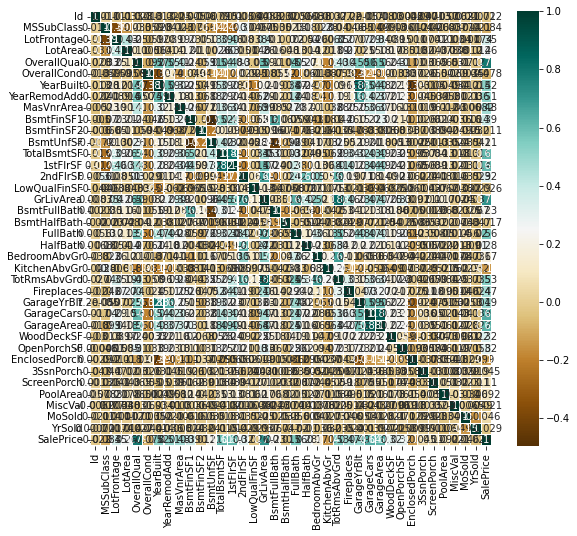

In [ ]:
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

In [ ]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data['LotFrontage'].mean()

70.04995836802665

In [ ]:
data=data.drop(['LotFrontage','Street','Alley','Neighborhood','LotShape','EnclosedPorch','HouseStyle','GarageYrBlt','GarageCars','SaleCondition','SaleType','YrSold','GarageQual','ExterQual','BsmtQual','OverallQual','KitchenQual','BldgType','Condition2','Condition1','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','PoolQC','Fence','MiscFeature','BsmtExposure','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','GarageType','GarageFinish','BsmtFinType1','BsmtFinType2','FireplaceQu','MoSold','PavedDrive','MasVnrType'], axis =  1)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageArea', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

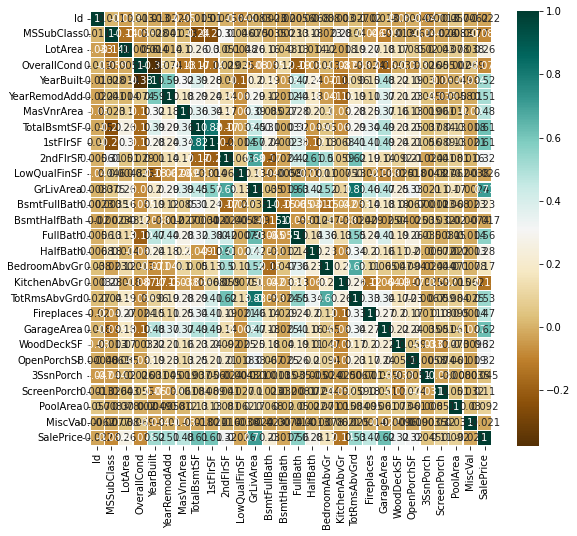

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

In [ ]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
ExterCond        0
Foundation       0
BsmtCond        37
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageArea       0
GarageCond      81
WoodDeckSF       0
OpenPorchSF      0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

In [ ]:
data.head(20)

,Id,MSSubClass,MSZoning,LotArea,LandContour,Utilities,LotConfig,LandSlope,OverallCond,YearBuilt,...,Fireplaces,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,RL,8450,Lvl,AllPub,Inside,Gtl,5,2003,...,0,548,TA,0,61,0,0,0,0,208500
1,2,20,RL,9600,Lvl,AllPub,FR2,Gtl,8,1976,...,1,460,TA,298,0,0,0,0,0,181500
2,3,60,RL,11250,Lvl,AllPub,Inside,Gtl,5,2001,...,1,608,TA,0,42,0,0,0,0,223500
3,4,70,RL,9550,Lvl,AllPub,Corner,Gtl,5,1915,...,1,642,TA,0,35,0,0,0,0,140000
4,5,60,RL,14260,Lvl,AllPub,FR2,Gtl,5,2000,...,1,836,TA,192,84,0,0,0,0,250000
5,6,50,RL,14115,Lvl,AllPub,Inside,Gtl,5,1993,...,0,480,TA,40,30,320,0,0,700,143000
6,7,20,RL,10084,Lvl,AllPub,Inside,Gtl,5,2004,...,1,636,TA,255,57,0,0,0,0,307000
7,8,60,RL,10382,Lvl,AllPub,Corner,Gtl,6,1973,...,2,484,TA,235,204,0,0,0,350,200000
8,9,50,RM,6120,Lvl,AllPub,Inside,Gtl,5,1931,...,2,468,TA,90,0,0,0,0,0,129900
9,10,190,RL,7420,Lvl,AllPub,Corner,Gtl,6,1939,...,2,205,TA,0,4,0,0,0,0,118000


In [ ]:
data.shape

(1460, 42)

In [ ]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
ExterCond        0
Foundation       0
BsmtCond        37
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageArea       0
GarageCond      81
WoodDeckSF       0
OpenPorchSF      0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageArea', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [ ]:
data['Id'].dtypes

dtype('int64')

In [ ]:
#pd.to_numeric(data['MSZoning'], errors='coerce')

In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotArea,LandContour,Utilities,LotConfig,LandSlope,OverallCond,YearBuilt,...,Fireplaces,GarageArea,GarageCond,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,RL,8450,Lvl,AllPub,Inside,Gtl,5,2003,...,0,548,TA,0,61,0,0,0,0,208500
1,2,20,RL,9600,Lvl,AllPub,FR2,Gtl,8,1976,...,1,460,TA,298,0,0,0,0,0,181500
2,3,60,RL,11250,Lvl,AllPub,Inside,Gtl,5,2001,...,1,608,TA,0,42,0,0,0,0,223500
3,4,70,RL,9550,Lvl,AllPub,Corner,Gtl,5,1915,...,1,642,TA,0,35,0,0,0,0,140000
4,5,60,RL,14260,Lvl,AllPub,FR2,Gtl,5,2000,...,1,836,TA,192,84,0,0,0,0,250000
5,6,50,RL,14115,Lvl,AllPub,Inside,Gtl,5,1993,...,0,480,TA,40,30,320,0,0,700,143000
6,7,20,RL,10084,Lvl,AllPub,Inside,Gtl,5,2004,...,1,636,TA,255,57,0,0,0,0,307000
7,8,60,RL,10382,Lvl,AllPub,Corner,Gtl,6,1973,...,2,484,TA,235,204,0,0,0,350,200000
8,9,50,RM,6120,Lvl,AllPub,Inside,Gtl,5,1931,...,2,468,TA,90,0,0,0,0,0,129900
9,10,190,RL,7420,Lvl,AllPub,Corner,Gtl,6,1939,...,2,205,TA,0,4,0,0,0,0,118000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LandContour   1460 non-null   object 
 5   Utilities     1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   LandSlope     1460 non-null   object 
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  MasVnrArea    1452 non-null   float64
 12  ExterCond     1460 non-null   object 
 13  Foundation    1460 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  TotalBsmtSF   1460 non-null   int64  
 16  Heating       1460 non-null   object 
 17  HeatingQC     1460 non-null   object 
 18  CentralAir    1460 non-null 

In [ ]:

#df['MSSubClass'] = (df['MSSubClass'] !='n').astype(int)
#df['MSSubClass'][:9]

In [ ]:
'''
df = pd.DataFrame(data)
df['MSZoning'] = df['MSZoning'].astype(int)

print (df)
print (df.dtypes)
'''

"\ndf = pd.DataFrame(data)\ndf['MSZoning'] = df['MSZoning'].astype(int)\n\nprint (df)\nprint (df.dtypes)\n"

In [ ]:
'''
data['MSZoning'] = data['MSZoning'].map({'A':0,'C':1,'FV':2,'I':3,'RH':4,'RL':5,'RP':6,'RM':7})
data['LandContour'] = data['LandContour'].map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})
data['Utilities'] = data['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})
data['LotConfig'] = data['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
data['LandSlope'] = data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
data['ExterCond'] = data['ExterCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
data['Foundation'] = data['Foundation'].map({'BrkTil':0,'CBlock':1,'PConc':2,'Slab':3,'Stone':4,'Wood':5})
data['BsmtCond'] = data['BsmtCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Fa':4,'NA':5})
data['Heating'] = data['Heating'].map({'Floor':0,'Floor':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})
data['HeatingQC'] = data['HeatingQC'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Fa':4})
data['CentralAir'] = data['CentralAir'].map({'N':0,'Y':1})
data['Electrical'] = data['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
data['Functional'] = data['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Maj2':6,'Sal':7})
data['GarageCond'] = data['GarageCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
'''




"\ndata['MSZoning'] = data['MSZoning'].map({'A':0,'C':1,'FV':2,'I':3,'RH':4,'RL':5,'RP':6,'RM':7})\ndata['LandContour'] = data['LandContour'].map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})\ndata['Utilities'] = data['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})\ndata['LotConfig'] = data['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})\ndata['LandSlope'] = data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})\ndata['ExterCond'] = data['ExterCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})\ndata['Foundation'] = data['Foundation'].map({'BrkTil':0,'CBlock':1,'PConc':2,'Slab':3,'Stone':4,'Wood':5})\ndata['BsmtCond'] = data['BsmtCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Fa':4,'NA':5})\ndata['Heating'] = data['Heating'].map({'Floor':0,'Floor':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})\ndata['HeatingQC'] = data['HeatingQC'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Fa':4})\ndata['CentralAir'] = data['CentralAir'].map({'N':0,'Y':1})\ndata['Electrical'] = data['Electrical'].map({'SBrkr

In [ ]:
li = [data[i].dtype == 'O' for i in data.columns]
re= list(data.columns[li])
print(re)
print(len(re))

['MSZoning', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'ExterCond', 'Foundation', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'GarageCond']
14


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterCond', 'Foundation', 'BsmtCond', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageArea', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(data[re]).toarray())

final_df = data.join(encoder_df)
final_df.drop(re,axis=1,inplace=True)

print(final_df)
final_df.head(3)

        Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0        1          60     8450            5       2003          2003   
1        2          20     9600            8       1976          1976   
2        3          60    11250            5       2001          2002   
3        4          70     9550            5       1915          1970   
4        5          60    14260            5       2000          2000   
...    ...         ...      ...          ...        ...           ...   
1455  1456          60     7917            5       1999          2000   
1456  1457          20    13175            6       1978          1988   
1457  1458          70     9042            9       1941          2006   
1458  1459          20     9717            6       1950          1996   
1459  1460          20     9937            6       1965          1965   

      MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...   57   58   59   60  \
0          196.0          856       856      

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,57,58,59,60,61,62,63,64,65,66
0,1,60,8450,5,2003,2003,196.0,856,856,854,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,9600,8,1976,1976,0.0,1262,1262,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,11250,5,2001,2002,162.0,920,920,866,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   LotArea       1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   YearRemodAdd  1460 non-null   int64  
 6   MasVnrArea    1452 non-null   float64
 7   TotalBsmtSF   1460 non-null   int64  
 8   1stFlrSF      1460 non-null   int64  
 9   2ndFlrSF      1460 non-null   int64  
 10  LowQualFinSF  1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  KitchenAbvGr  1460 non-null   int64  
 18  TotRmsAbvGrd  1460 non-null 

In [ ]:
'''X = data[]
Y = data[['SalePrice']]

model=LinearRegression()
model.fit(X_train,Y_train)

model.predict(X_test)

model_score=model.score(X_test,Y_test)
print(model_score)

Y_pred = model.predict(X)
plt.plot(X, Y_pred, color='red')

plt.scatter(X, Y)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Sale Price')
plt.show()
'''

0.32498058892607384


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1stFlrSF
- 2ndFlrSF
- 3SsnPorch
- BedroomAbvGr
- BsmtCond
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
X_train = data.drop(['SalePrice'],axis=1)
Y_train = data['SalePrice']
model = LinearRegression()
print(X_train)
print(Y_train)
pred = model.fit(X_train.to_numpy(),Y_train.to_numpy())

#print(pred.coef_.shape)
#print(pred.intercept_)

#model.predict(X_test)



        Id  MSSubClass MSZoning  LotArea LandContour Utilities LotConfig  \
0        1          60       RL     8450         Lvl    AllPub    Inside   
1        2          20       RL     9600         Lvl    AllPub       FR2   
2        3          60       RL    11250         Lvl    AllPub    Inside   
3        4          70       RL     9550         Lvl    AllPub    Corner   
4        5          60       RL    14260         Lvl    AllPub       FR2   
...    ...         ...      ...      ...         ...       ...       ...   
1455  1456          60       RL     7917         Lvl    AllPub    Inside   
1456  1457          20       RL    13175         Lvl    AllPub    Inside   
1457  1458          70       RL     9042         Lvl    AllPub    Inside   
1458  1459          20       RL     9717         Lvl    AllPub    Inside   
1459  1460          20       RL     9937         Lvl    AllPub    Inside   

     LandSlope  OverallCond  YearBuilt  ...  Functional  Fireplaces  \
0          Gtl  

ValueError: ignored